# Perkenalan

Nama: Made Ary Widanthi <br>
Batch: FTDS 020 RMT<br>
Objective: Buatlah model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan.

SQL Query <br>

```
SELECT *
FROM ftds-hacktiv8-project.phase1_ftds_020_rmt.heart-failure
```





# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import json

     ---------------------------------------- 0.0/326.6 kB ? eta -:--:--
     ------- ------------------------------- 61.4/326.6 kB 1.1 MB/s eta 0:00:01
     -------------------- ----------------- 174.1/326.6 kB 1.8 MB/s eta 0:00:01
     ----------------------------- -------- 256.0/326.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 326.6/326.6 kB 2.0 MB/s eta 0:00:00


# Data Loading

In [4]:
data = pd.read_csv('h8dsft_P1G3_AryWidanthi.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [5]:
# Menampilkan 10 data pertama

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [6]:
# Menampilkan 10 data terakhir

data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [7]:
data_duplicate = data.copy()

In [8]:
EDA = data.copy()

In [9]:
# Check data -1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA (Exploratory Data)

In [12]:
for column in EDA:
  print(column, ":", data[column].unique(), "\n")

age : [42.    46.    65.    53.    50.    70.    60.    59.    72.    49.
 75.    57.    48.    62.    52.    55.    58.    86.    66.    80.
 45.    67.    90.    95.    63.    61.    60.667 40.    73.    51.
 82.    43.    85.    64.    68.    54.    69.    47.    44.    81.
 87.    94.    56.    41.    78.    77.    79.   ] 

anaemia : [1 0] 

creatinine_phosphokinase : [ 250  168  160   91  582  125   52  161   76  280  156 1896   56  211
   80  128  159  124  129  328  482  167  131  166 2522 1051  249  281
  291  335   58 2334  835  972   81  572   88  618  892  235  260  144
   68   96  776  326  213   84  337 1820  112  318   69   61  400  719
  151  101 2281  720 1185  207  655  336  233  244  855   53  358 1202
  615  588   92   59  143  102  113  200   62  675  157 2060 3964  427
  246  212  146  111  553  789  364   47   66  115 1199  231 1380  577
 7702  110  154  514  305  898  369  646  943  176  395  145   57 2017
  258  981   70 2656  371 5209  248 1548  185  132 2442 

##Data detail: <br>

- Sex - Gender of patient Male = 1, Female =0
- Diabetes - 0 = No, 1 = Yes
- Anaemia - 0 = No, 1 = Yes
- High_blood_pressure - 0 = No, 1 = Yes
- Smoking - 0 = No, 1 = Yes
- DEATH_EVENT - 0 = No, 1 = Yes
- creatinine_phosphokinase: enzim yang terdapat dalam otot jantung, otot rangka, dan otot polos. Enzim ini berperan dalam proses energi seluler dan memainkan peran penting dalam diagnosis dan pemantauan kondisi yang terkait dengan kerusakan atau gangguan otot, terutama jantung.
-ejection_fraction: parameter yang digunakan dalam bidang kardiologi untuk mengukur seberapa efisien jantung memompa darah keluar dari ventrikel kiri setiap kali berkontraksi.

Penjelasan data: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/discussion/193109


In [13]:
num_cols = list(EDA.select_dtypes('number'))
num_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

0    203
1     96
Name: DEATH_EVENT, dtype: int64


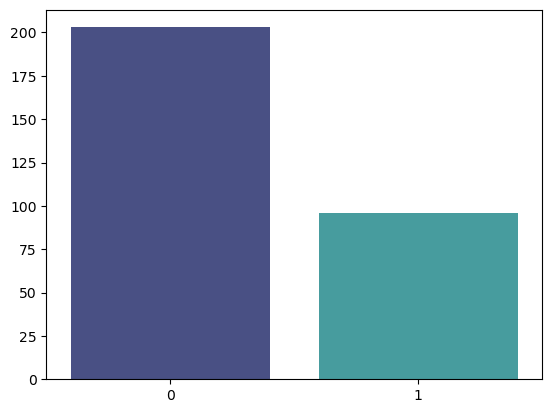

In [14]:
print(EDA['DEATH_EVENT'].value_counts())
gagal_jantung = EDA['DEATH_EVENT'].value_counts()
ax = sns.barplot(x=gagal_jantung.index, y=gagal_jantung.values, palette='mako', errwidth=0)

Pada data health failure, terdapat 96 pasien meninggal karena gagal jantung dan 203 pasien yang tidak meninggal. (32.11% pasien meninggal)

Melakukan kategori umur agar memudahkan untuk mengambil insight dan membaca data.

In [15]:
# Mengkategorikan umur agar lebih memudahkan dalam analisa
bins = [40, 46, 56, 95]
labels = ['40-60', '61-80', '81-95']

EDA['Age Category'] = pd.cut(EDA['age'], bins=bins, labels=labels)

EDA.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age Category
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1,40-60
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1,40-60
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1,81-95
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1,61-80
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0,61-80


  Age Category  DEATH_EVENT  count
0        40-60            0     25
1        40-60            1      8
2        61-80            0     56
3        61-80            1     17
4        81-95            0    115
5        81-95            1     71


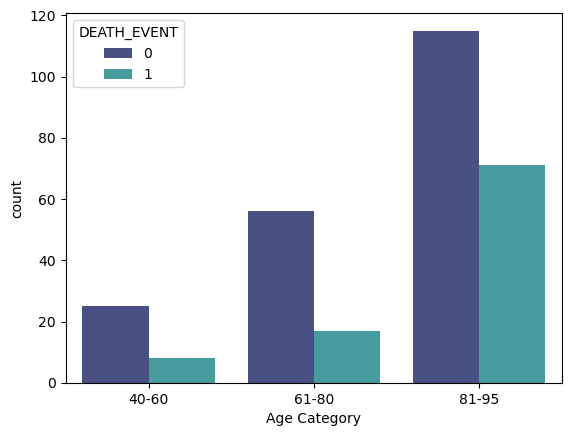

In [16]:
print(EDA.groupby(['Age Category', 'DEATH_EVENT']).size().reset_index(name='count'))
gender = EDA.groupby(['Age Category', 'DEATH_EVENT']).size().reset_index(name='count')

# Plot the bar chart
ax = sns.barplot(x='Age Category', y='count', hue='DEATH_EVENT', data=gender, palette='mako', errwidth=0)
plt.show()

Pasien yang meninggal karena gagal jantung terbanyak berada pada rentang usia 81-95 tahun. Hal ini bisa disebabkan oleh faktor usia dan jg gaya hidup setiap pasien.

jumlah data orang yang terkena anemia:
 anaemia  DEATH_EVENT
0        0              120
         1               50
1        0               83
         1               46
Name: DEATH_EVENT, dtype: int64


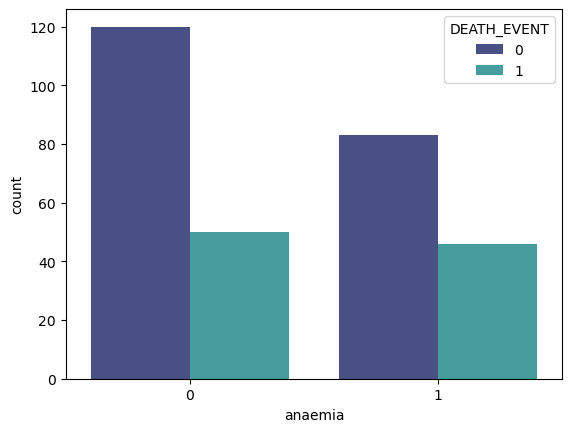

In [17]:
print("jumlah data orang yang terkena anemia:\n",EDA.groupby(data['anaemia'])['DEATH_EVENT'].value_counts())
anaemia = EDA.groupby(['anaemia', 'DEATH_EVENT']).size().reset_index(name='count')

ax = sns.barplot(x='anaemia', y='count', hue='DEATH_EVENT', data=anaemia, palette='mako', errwidth=0)
plt.show()

Pasien yang mengidap anemia sebanyak 27,41% mengalami gagal jantung. Dapat menjadi hipothesis bahwa penyakit anemia dapat menyebabkan gagal jantung

0    174
1    125
Name: diabetes, dtype: int64
diabetes  DEATH_EVENT
0         0              118
          1               56
1         0               85
          1               40
Name: DEATH_EVENT, dtype: int64


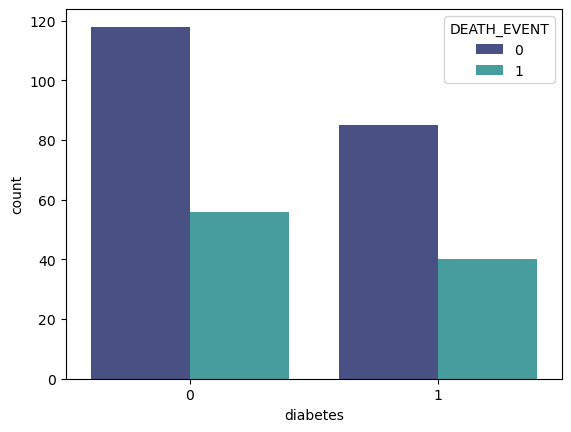

In [18]:
print(EDA['diabetes'].value_counts())
print(EDA.groupby(EDA['diabetes'])['DEATH_EVENT'].value_counts())
diabetes = EDA.groupby(['diabetes', 'DEATH_EVENT']).size().reset_index(name='count')

ax = sns.barplot(x='diabetes', y='count', hue='DEATH_EVENT', data=diabetes, palette='mako', errwidth=0)
plt.show()

13.38% pasien yang memiliki penyakit diabetes mengalami gagal jantung, walaupun persentase nya kecil, tapi akan dilakukan analisa lebih lanjut.

0    194
1    105
Name: high_blood_pressure, dtype: int64
high_blood_pressure  DEATH_EVENT
0                    0              137
                     1               57
1                    0               66
                     1               39
Name: DEATH_EVENT, dtype: int64


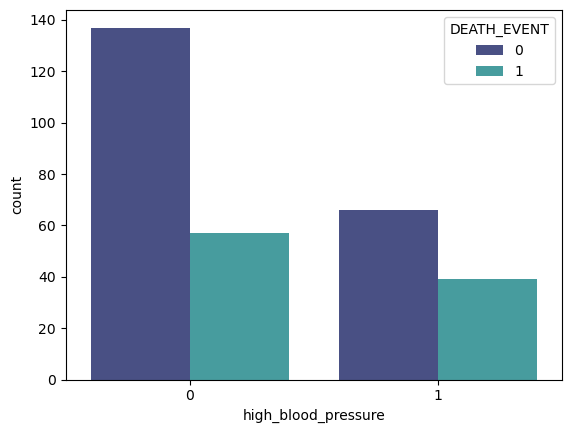

In [19]:
print(EDA['high_blood_pressure'].value_counts())
print(EDA.groupby(EDA['high_blood_pressure'])['DEATH_EVENT'].value_counts())
high_blood_pressure = EDA.groupby(['high_blood_pressure', 'DEATH_EVENT']).size().reset_index(name='count')

ax = sns.barplot(x='high_blood_pressure', y='count', hue='DEATH_EVENT', data=high_blood_pressure, palette='mako', errwidth=0)
plt.show()

sebanyak 13.04% pasien yang memiliki tekanan darah tinggi mengalami gagal jantung

1    194
0    105
Name: sex, dtype: int64
sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: DEATH_EVENT, dtype: int64


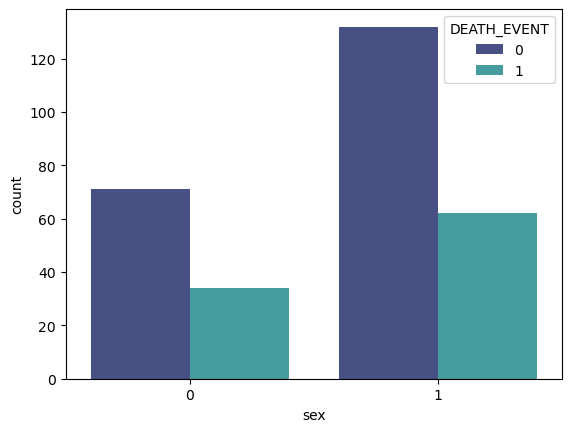

In [20]:
print(EDA['sex'].value_counts())
print(EDA.groupby(EDA['sex'])['DEATH_EVENT'].value_counts())
education = EDA.groupby(['sex', 'DEATH_EVENT']).size().reset_index(name='count')

ax = sns.barplot(x='sex', y='count', hue='DEATH_EVENT', data=education, palette='mako', errwidth=0)
plt.show()

20.74% pasien yang mengalami gagal jantung merupakan laki-laki. Ada kemungkinan bahwa gender mempengaruhi orang yang mengalami gagal jantung

0    203
1     96
Name: smoking, dtype: int64
smoking  DEATH_EVENT
0        0              137
         1               66
1        0               66
         1               30
Name: DEATH_EVENT, dtype: int64


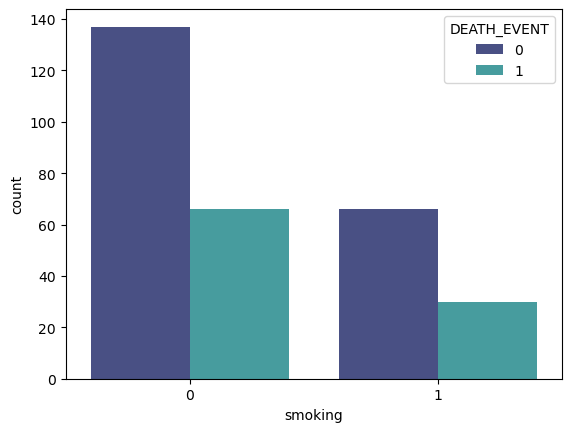

In [21]:
print(data['smoking'].value_counts())
print(data.groupby(EDA['smoking'])['DEATH_EVENT'].value_counts())
education = data.groupby(['smoking', 'DEATH_EVENT']).size().reset_index(name='count')

ax = sns.barplot(x='smoking', y='count', hue='DEATH_EVENT', data=education, palette='mako', errwidth=0)
plt.show()

22.07% pasien meninggal karena gagal jantung tetapi merokok. Hypothesisnya bahwa orang merokok belum tentun menyebabkan gagal jantung.

# Feature Engineering

## Split between Train-Set and Test-Set

In [22]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215


In [23]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (239, 12)
Test Size :  (60, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
137,60.0,1,231,1,25,0,194000.00,1.70,140,1,0,120
297,53.0,1,446,0,60,1,263358.03,1.00,139,1,0,215
56,55.0,0,1820,0,38,0,270000.00,1.20,139,0,0,271
182,53.0,1,270,1,35,0,227000.00,3.40,145,1,0,105
96,65.0,1,59,1,60,0,172000.00,0.90,137,0,0,107
...,...,...,...,...,...,...,...,...,...,...,...,...
94,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94
211,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27
296,70.0,0,97,0,60,1,220000.00,0.90,138,1,0,186
34,70.0,0,835,0,35,1,305000.00,0.80,133,0,0,145


## Handle Outlier

In [24]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age, anemia, diabetes, sex, smoking termasuk feature yang bersifat kategorikal karena terdiri dari value 0 dan 1, maka dari itu tidak akan di handle outlier

In [25]:
# Mengkategorikan X_train_num

X_train_num = X_train[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

creatinine_phosphokinase    4.033352
ejection_fraction           0.536167
platelets                   1.187697
serum_creatinine            4.520990
serum_sodium               -0.222674
time                        0.182598
dtype: float64


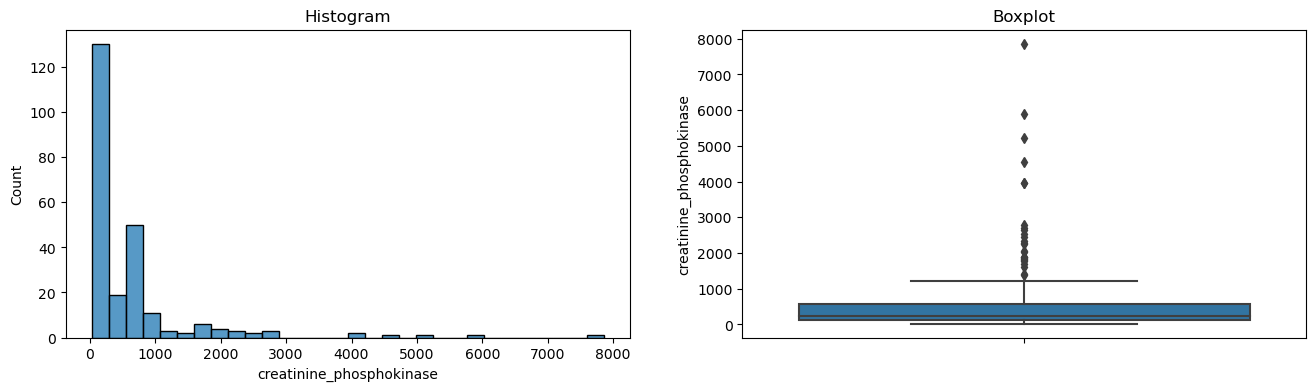

creatinine_phosphokinase : None


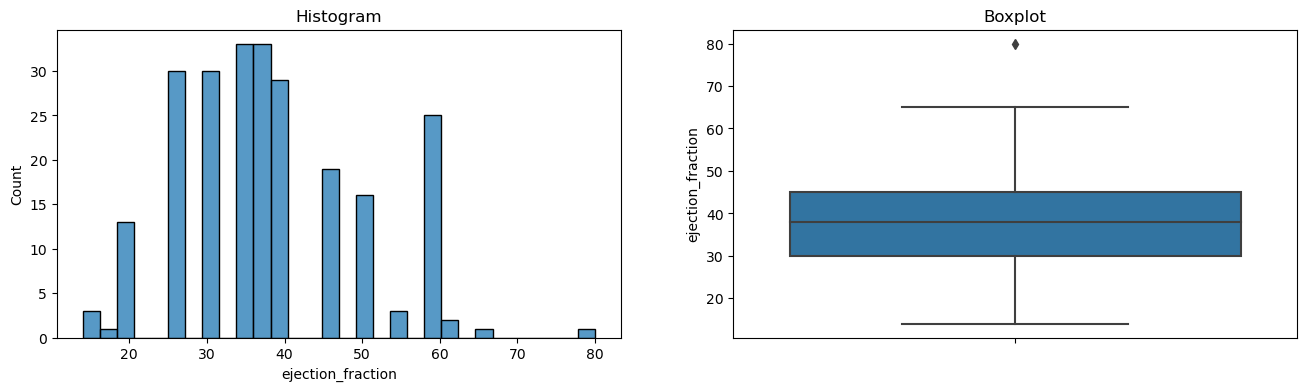

ejection_fraction : None


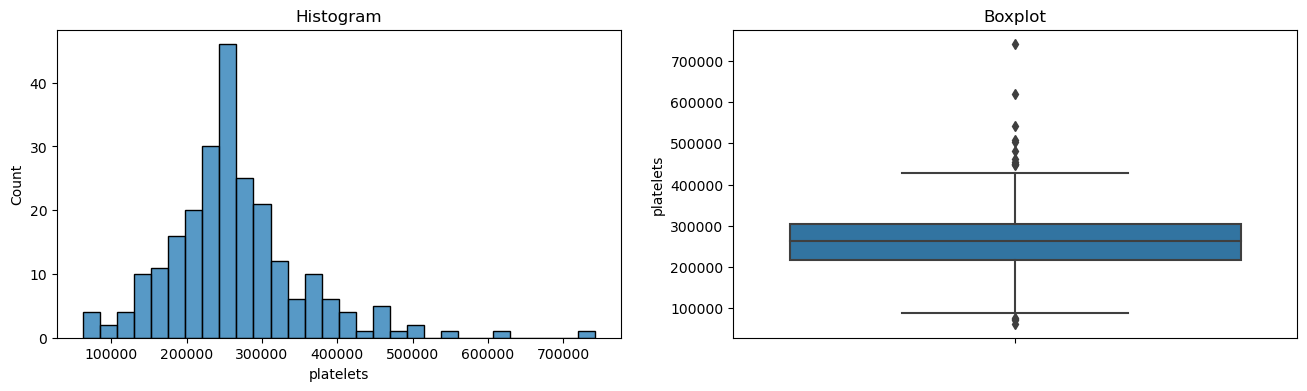

platelets : None


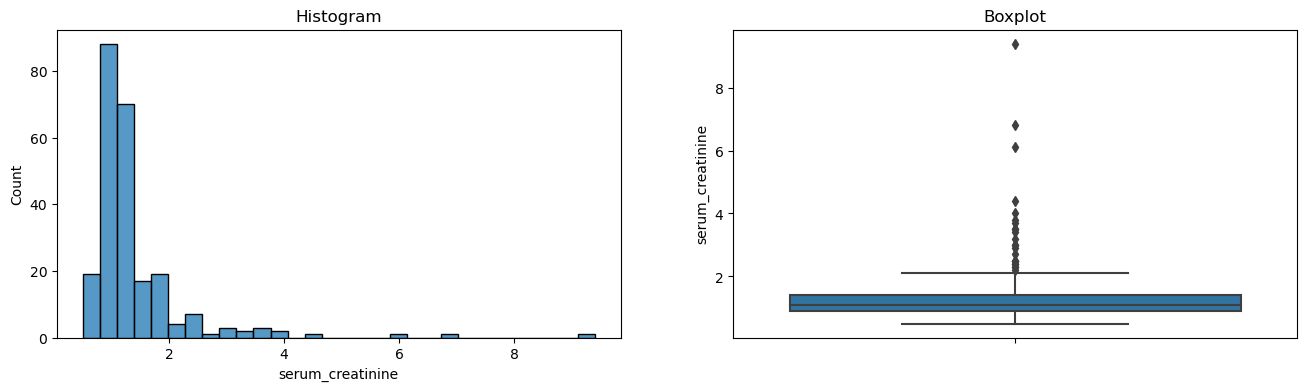

serum_creatinine : None


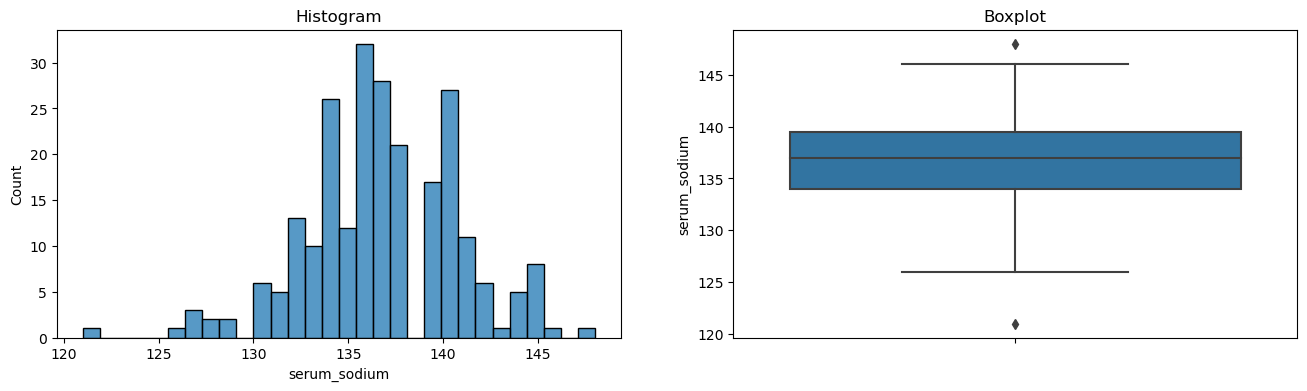

serum_sodium : None


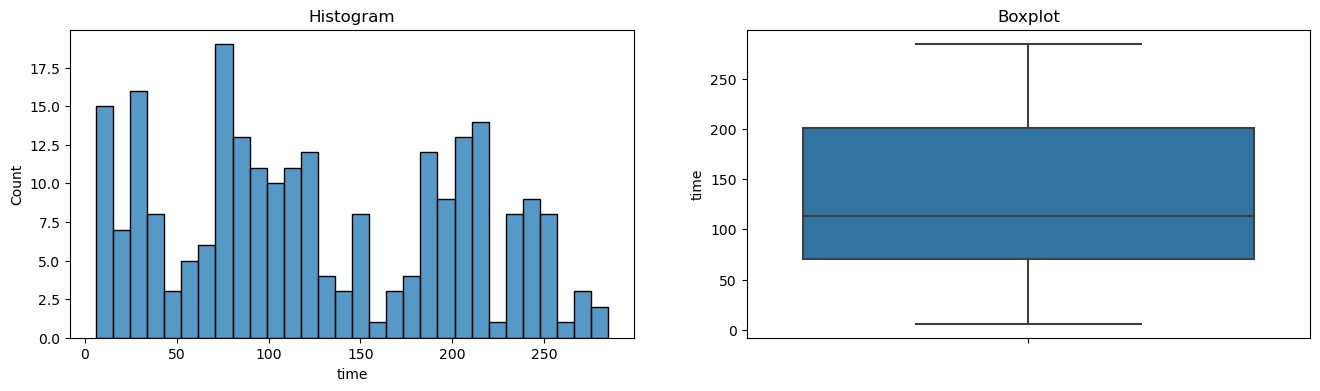

time : None


In [26]:
print(X_train_num.skew())

for column in X_train_num:
  print(column, ":", diagnostic_plots(X_train_num,column))

nilai skewness berada di range -0.5 and 0.5; yang mendekati range tersebut adalah ejection_fraction dengan nilai 0.536167. Sisanya merupakan distribusi tidak normal.

In [27]:
# Membuat fungsi untuk mencari batas atas dan batas bawah
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [28]:
for column in ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']:
  print("Upper dan lower boundary dari kolom",column, ":", find_skewed_boundaries(data, column , 1.5))

Upper dan lower boundary dari kolom creatinine_phosphokinase : (1280.25, -581.75)
Upper dan lower boundary dari kolom ejection_fraction : (67.5, 7.5)
Upper dan lower boundary dari kolom platelets : (440000.0, 76000.0)
Upper dan lower boundary dari kolom serum_creatinine : (2.1499999999999995, 0.15000000000000024)
Upper dan lower boundary dari kolom serum_sodium : (149.0, 125.0)
Upper dan lower boundary dari kolom time : (398.0, -122.0)


In [29]:
for column in  ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']:
    upper_boundary, lower_boundary = find_skewed_boundaries(X_train_num, column, 1.5)
    outliers = X_train_num[X_train_num[column] > upper_boundary]
    print('Total data outliers in {}: {}'.format(column, len(outliers)))


Total data outliers in creatinine_phosphokinase: 26
Total data outliers in ejection_fraction: 1
Total data outliers in platelets: 11
Total data outliers in serum_creatinine: 23
Total data outliers in serum_sodium: 1
Total data outliers in time: 0


### Cencoring

Menggunakan metode cencoring untuk menghindari menghapus data

In [30]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'])

windsoriser.fit(X_train)

after = windsoriser.transform(X_train)

In [31]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'creatinine_phosphokinase': -585.5, 'ejection_fraction': 7.5, 'platelets': 85500.0, 'serum_creatinine': 0.15000000000000024, 'serum_sodium': 125.75, 'time': -126.5}
Right Tail Caps :  {'creatinine_phosphokinase': 1282.5, 'ejection_fraction': 67.5, 'platelets': 433500.0, 'serum_creatinine': 2.1499999999999995, 'serum_sodium': 147.75, 'time': 397.5}


In [32]:
print('Data - Before Capping')
print(X_train[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].describe())
print('')
print('Data - After Capping')
print(after[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].describe())

Data - Before Capping
       creatinine_phosphokinase  ejection_fraction      platelets  \
count                239.000000         239.000000     239.000000   
mean                 589.054393          38.196653  263816.571548   
std                  957.766546          11.868990   90048.334386   
min                   23.000000          14.000000   62000.000000   
25%                  115.000000          30.000000  216000.000000   
50%                  245.000000          38.000000  262000.000000   
75%                  582.000000          45.000000  303000.000000   
max                 7861.000000          80.000000  742000.000000   

       serum_creatinine  serum_sodium        time  
count        239.000000    239.000000  239.000000  
mean           1.357406    136.719665  127.330544  
std            0.947848      4.034628   77.259926  
min            0.500000    121.000000    6.000000  
25%            0.900000    134.000000   70.000000  
50%            1.100000    137.000000  113.0

In [33]:
# memasukan hasil transform windsorizer pada X_train_num
X_train = windsoriser.transform(X_train)

In [34]:
# memasukan hasil transform windsorizer pada X_test_num
X_test = windsoriser.transform(X_test)

## Missing Value

In [35]:
X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

Tidak dapat missing value pada data

## Feature Selection

Menggunakan metode VIF untuk menganalisa multikoleniaritas

In [36]:
# Get Numeric Columns and Cetogory Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num columns', num_columns)
print('Cat columns', cat_columns)

Num columns ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Cat columns []


In [37]:
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

In [38]:
# creating dummies for income_bracket
target = y_train

# the independent variables set
X = data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                    feature        VIF
0  creatinine_phosphokinase   1.368426
1         ejection_fraction  11.778296
2                 platelets   8.341317
3          serum_creatinine   2.828508
4              serum_sodium  23.686326
5                      time   3.932481


Nilai multikolinearitas > 5 tidak cocok untuk digunakan dalam modeling, maka feature yang akan digunakan adalah creatinine_phosphokinase, serum_creatinine, time.

Age, anemia, diabetes, sex, smoking merupakan kategorikal data dan akan menggunakan chi-square method

In [39]:
cat_data = data[['sex', 'age', 'anaemia', 'diabetes']]
target = data['DEATH_EVENT']

# Convert cat_data to a DataFrame
cat_data = pd.DataFrame(cat_data)

# Feature selection categorical data
chi_scores_cat = chi2(cat_data, target)
p_values_cat = pd.Series(chi_scores_cat[1], index=cat_data.columns)
p_values_cat.sort_values(ascending=False, inplace=True)
p_values_cat

diabetes    9.795537e-01
sex         9.647213e-01
anaemia     3.875569e-01
age         2.393020e-11
dtype: float64

p value yang lebih rendah umumnya menunjukkan asosiasi yang lebih signifikan, menunjukkan bahwa fitur yang sesuai cenderung informatif untuk memprediksi target. <br>

Pada hasil feature selection menggunakan chi square hanya age yang menghasilkan p-value dibawah 0.05, selain feature age, tidak akan digunakan saat modeling

In [40]:
X_train_num.drop(['sex', 'diabetes', 'anaemia', 'ejection_fraction', 'platelets', 'serum_sodium'], axis=1, inplace=True)

In [41]:
X_test_num.drop(['sex', 'diabetes', 'anaemia', 'ejection_fraction', 'platelets', 'serum_sodium'], axis=1, inplace=True)

## Feature Scaling

Menggunakan methode minmaxscaler pada feature yang tidak terdistribusi secara normal yaitu: 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'

In [42]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num) #harus x_train

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_train_scaled

array([[0.36363636, 0.1651449 , 0.        , 0.72727273, 0.        ,
        0.40860215],
       [0.23636364, 0.33584756, 1.        , 0.3030303 , 0.        ,
        0.74910394],
       [0.27272727, 1.        , 0.        , 0.42424242, 0.        ,
        0.94982079],
       ...,
       [0.54545455, 0.05875347, 1.        , 0.24242424, 0.        ,
        0.64516129],
       [0.54545455, 0.64470028, 1.        , 0.18181818, 0.        ,
        0.49820789],
       [0.36363636, 0.44382692, 0.        , 1.        , 0.        ,
        0.32258065]])

## Feature encoding

Data kategori yang tersedia sudah berupa angka (numerikal), jadi tidak perlu dilakukan feture encoding

# Model Definition

Menggunakan Random Forest dan Gradient Boosting

# Random Forest

## Hyperparameter Tunning

Melakukan Hyperparameter Tunning pada model Random Forest

In [ ]:
# Define the Gradient Boosting classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 300]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", best_model.score(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Test Set Accuracy: 0.8666666666666667


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200} <br>

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Test Set Accuracy: 0.8666666666666667

##Random Forest Model Definition

In [43]:
#Random Forest model base

rf_clf = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=100)
rf_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3)

F1 Score - Train Set: 0.8859060402684563
Confusion Matrix Train Set:
 [[156   5]
 [ 12  66]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       161
           1       0.93      0.85      0.89        78

    accuracy                           0.93       239
   macro avg       0.93      0.91      0.92       239
weighted avg       0.93      0.93      0.93       239

F1 Score - Test Set: 0.823529411764706
Confusion Matrix Test Set:
 [[156   5]
 [ 12  66]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.88      0.78      0.82        18

    accuracy                           0.90        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.90      0.90      0.90        60



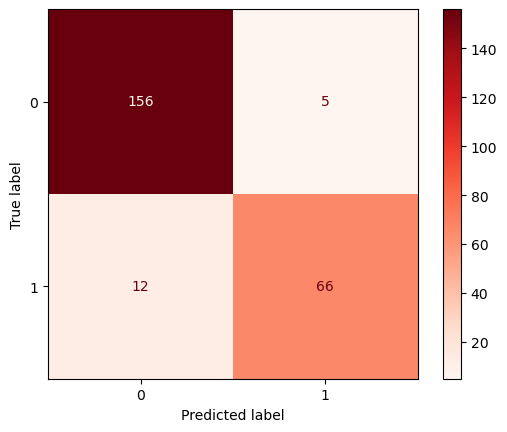

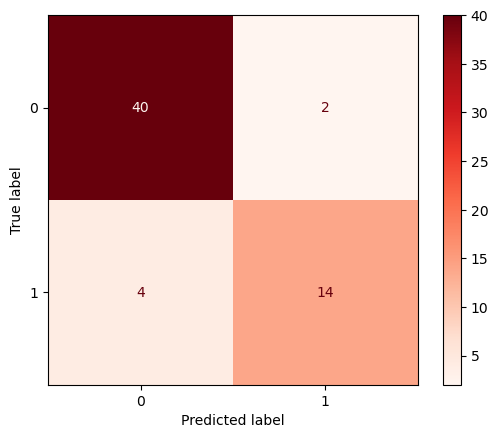

In [44]:
y_pred_train_rf = rf_clf.predict(X_train_scaled)
y_pred_test_rf = rf_clf.predict(X_test_scaled)
y_pred_train_rf

# Calculate confusion matrix
cm_rf_clf_train = confusion_matrix(y_train, y_pred_train_rf)
print('F1 Score - Train Set:', f1_score(y_train, y_pred_train_rf))
print('Confusion Matrix Train Set:\n', cm_rf_clf_train)
print(classification_report(y_train, y_pred_train_rf))
disp_rf_clf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_clf_train, display_labels=['0', '1'])
disp_rf_clf_train.plot(cmap='Reds')


cm_rf_clf_test = confusion_matrix(y_test, y_pred_test_rf)
print('F1 Score - Test Set:', f1_score(y_test, y_pred_test_rf))
print('Confusion Matrix Test Set:\n', cm_rf_clf_train)
print(classification_report(y_test, y_pred_test_rf))
disp_rf_clf_test = ConfusionMatrixDisplay(confusion_matrix=cm_rf_clf_test, display_labels=['0', '1'])
disp_rf_clf_test.plot(cmap='Reds')

Selisih antara f1 score train set dan test set sebanyak 30%

# Gradient Boosting

## Hyperparameter Tunning

In [ ]:
# Define the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", best_model.score(X_test_scaled, y_test))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Test Set Accuracy: 0.8333333333333334


##Gradient Boosting Model Definition

In [449]:
gb_classifier = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators=300)
gb_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(n_estimators=300)

F1 Score - Train Set: 1.0
Confusion Matrix Train Set:
 [[161   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        78

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

F1 Score - Test Set: 0.6875000000000001
Confusion Matrix Test Set:
 [[156   5]
 [ 13  65]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.79      0.61      0.69        18

    accuracy                           0.83        60
   macro avg       0.82      0.77      0.79        60
weighted avg       0.83      0.83      0.83        60



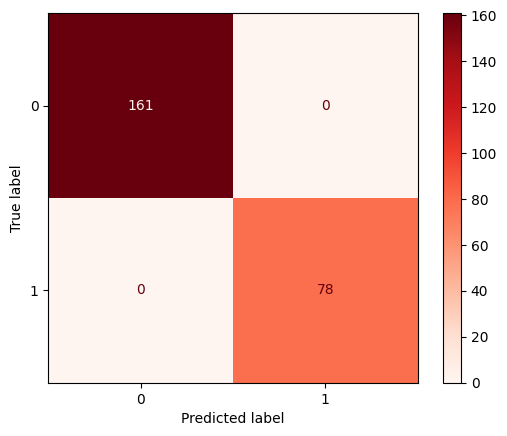

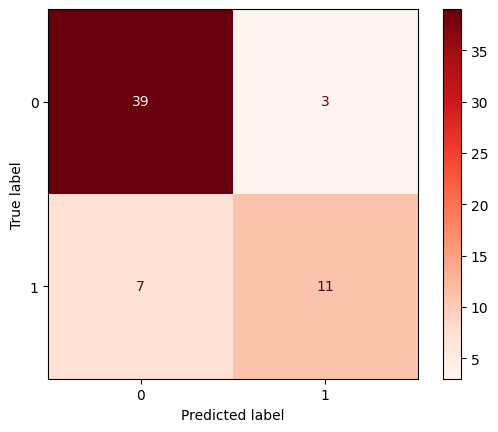

In [450]:
y_pred_train_gb = gb_classifier.predict(X_train_scaled)
y_pred_test_gb = gb_classifier.predict(X_test_scaled)
y_pred_train_gb

# Calculate confusion matrix
cm_gb_classifier_train = confusion_matrix(y_train, y_pred_train_gb)
print('F1 Score - Train Set:', f1_score(y_train, y_pred_train_gb))
print('Confusion Matrix Train Set:\n', cm_gb_classifier_train)
print(classification_report(y_train, y_pred_train_gb))
disp_rf_clf_train = ConfusionMatrixDisplay(confusion_matrix=cm_gb_classifier_train, display_labels=['0', '1'])
disp_rf_clf_train.plot(cmap='Reds')


cm_gb_classifier_test= confusion_matrix(y_test, y_pred_test_gb)
print('F1 Score - Test Set:', f1_score(y_test, y_pred_test_gb))
print('Confusion Matrix Test Set:\n', cm_rf_clf_train)
print(classification_report(y_test, y_pred_test_gb))
disp_rf_clf_test = ConfusionMatrixDisplay(confusion_matrix=cm_gb_classifier_test, display_labels=['0', '1'])
disp_rf_clf_test.plot(cmap='Reds')

Selisih antara f1 score train set dan test set sebanyak 32%

# Model Saving

In [386]:
num_columns

['age',
 'creatinine_phosphokinase',
 'high_blood_pressure',
 'serum_creatinine',
 'smoking',
 'time']

In [45]:
with open('num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_random_forest.pkl', 'wb') as file_3:
  pickle.dump(rf_clf, file_3) #after gridsearch

# Model Inference

In [452]:
# Create New Data

data_inf = {
            'age': 87,
            'anaemia': 1,
            'creatinine_phosphokinase':2281,
            'diabetes': 1,
            'ejection_fraction': 17,
            'high_blood_pressure': 0,
            'platelets': 153000,
            'serum_creatinine': 3.4,
            'serum_sodium':129,
            'sex': 1,
            'smoking': 1,
            'time': 150
}

data_inf = pd.DataFrame([data_inf])
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,87,1,2281,1,17,0,153000,3.4,129,1,1,150


In [453]:
# Split between Numerical Columns and Categorical Columns
num_columns = ['age','creatinine_phosphokinase', 'high_blood_pressure', 'serum_creatinine',  'smoking', 'time']
data_inf_num = data_inf[num_columns]

In [454]:
data_inf_num_scaled = scaler.transform(data_inf_num)

In [455]:
# Prediksi menggunakan model random forest yang sudah di cari best parameter di tahap grid search

y_pred_train_rf = rf_clf.predict(data_inf_num_scaled)
y_pred_train_rf

array([0])

# Kesimpulan
1. Based on EDA <br>
Berdasarkan data, 32.11% pasien meninggal karena gagal jantung dengan mayoritas umur rentang 81-95 dan 20.74% adalah laki-laki, bisa disimpulkan bahwa umur berpengaruh pada penyakit gagal jantung. Sebanyak 22.07% orang yang merokok mengalami gagal jantung, 13.38% pasien dengan diabetes juga mengalami gagal jantung, dan 13.04% individu yang memiliki tekanan darah tinggi meninggal karena gagal jantung.<br>

  Feature yang digunakan setelah menganalisa multikolinearitas pada feature adalah 'age','creatinine_phosphokinase', 'high_blood_pressure', 'serum_creatinine',  'smoking', 'time'

2. Based on Model Evaluation <br>
Setelah membandingkan pembuatan model menggunakan random forest dan gradient boosting, hasil yang paling baik adalah menggunakan random forest dengan tingkat akurasi 85% walaupun kedua model masih terbilang underfit karena memiliki selisih yang banyak antara f1score train set dan data set

3. Next step:
Langkah selanjutnya kita bisa membuat model improvement dengan berfokus meminimalkan jumlah False Positive atau pasien yang berpotensi mengalami gagal jantung tapi model tidak memprediksinya sebagai pasien gagal jantung. Hal ini dapat menyebabkan kematian akibat salah prediksi. <br>

  Mencoba menggunakan algoritma boosting lainnya dan mencoba menambahkan feature agar model bisa belajar lebih banyak mengenai data nya.

# Conceptual Problem

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging ! <br>
Parallel bagging merupakan salah satu teknik dari esnemble learning yang merupakan model improvement dari Decision Tree. Cara kerja nya adalah dengan melakukan prediksi berulang kali dengan data train set yang diacak dan hasil dari bagging adalah mengambil kelas yang paling sering muncul, output dapat berupa nilai rata-rata dari prediksi model. Metode bagging membantu mengurangi varians (variance) model dengan memperkenalkan variasi antara model yang dihasilkan.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih ! <br>
Random forest adalah kumpulan dari decision tree yang dimana merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model.

  Saat menggunakan algoritma boosting sequential, Model dibangun secara berurutan dan setiap model berusaha memperbaiki kesalahan dari model sebelumnya. Contoh hasil dari sample 1 akan di proses kembali ke model1 lalu akan menghasilkan sample 2 dan akan di proses kembali ke model selanjut nya sejumlah yang diinginkan.